In [44]:
# 1. Try other values of lambd, k
# 2. Build graph using this and run CC/networkx on it
# 3. Visualize by making subplot 312 313 as wide as 1:1 unit:unit suggests
# 4. Try other distance metrices
# 5. Idea: to close the feedback loop for finding parameters, need to develop training data (hand-labeled by Mohammed)?
#      -benefit: would not have to physically ask him
# TODO: eliminate duplicates in tweet body (they are spam)

import numpy as np
from sklearn import cluster
from matplotlib import pyplot as plt
%matplotlib inline

data = np.genfromtxt('tweet.csv', delimiter=",")
print data[0][0]

1.46127409465e+12


[ 4516269.15817667  1322410.03143628   303625.91891917   164247.40424035
   110715.06523187    84357.35775156    58040.00120581    41888.96245109
    33695.30205698    29216.54217678    25893.02966168    22455.84468173
    20404.83276899    17474.89414324    16378.46693493    15540.13539222
    14012.9869044     13316.65760552    12571.67939364]


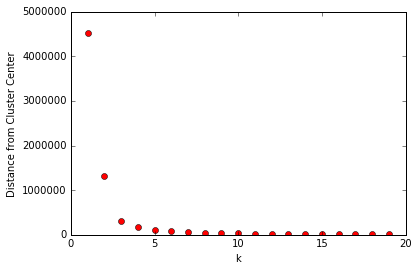

In [45]:
# Normalization
#STOP=142
STOP=len(data)
k_max=20
lambd = 10/(24*3.6e+6)
inertia = np.zeros(k_max-1)
mydata = data[:STOP,:]
for k in range(1,k_max):
    if k==1:
        mydata[:STOP,0] = data[:STOP,0]*lambd
    #print mydata[0,0], mydata[141,0]
    #print len(mydata)
    
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(mydata)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia[k-1] = kmeans.inertia_
    #print labels
print inertia
fig = plt.figure()
#plt.plot(carl_ssd, np.poly1d(np.polyfit(carl_ssd, carl_time, 1))(carl_ssd))
plt.plot(range(1,k_max), inertia, 'ro')
#plt.axis([1e-5, 1, 1e-8, 1])
plt.xlabel('k')
plt.ylabel('Distance from Cluster Center')
plt.show()
#fig.savefig('test.pdf', bbox_inches='tight')

In [46]:
from sklearn import cluster

k=10
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(mydata)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia[k-1] = kmeans.inertia_

In [47]:
data_label = np.loadtxt('tweet_label.txt', dtype=np.str, delimiter="\n")
label_list = np.zeros(len(mydata))-1
count = 0
for i in range(len(data_label)):
    if data_label[i][2:6]=='http' or data_label[i][3:7]=='http':
        try:
            label_list[count] = int(data_label[i][0:2])
            count+=1
            if count==len(mydata):
                break
            #print( data_label[i][0:2])
        except ValueError:
            continue

In [48]:
print np.where(label_list>=0)
print np.where(labels==0)
print np.where(np.logical_and(label_list>=0, labels==0))

(array([  0,   1,   2,   7,   8,  12,  13,  14,  15,  16,  21,  28,  29,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        47,  49,  50,  51,  53,  54,  55,  56,  58,  59,  60,  61,  63,
        64,  67,  69,  71,  74,  75,  76,  77,  78,  79,  82,  97,  98,
       104, 105, 132, 133, 134, 136, 141, 142, 146, 152, 153, 154, 155,
       156, 157]),)
(array([282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
       295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 327, 328, 329]),)
(array([], dtype=int64),)


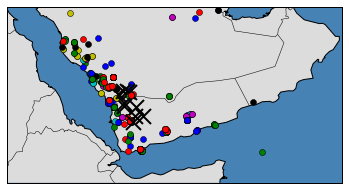

In [49]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap
import numpy as np

# Lambert Conformal Conic map.
fig1 = plt.figure()
resolution = 1
themap = Basemap(projection='gall',
              llcrnrlon = 35,
              llcrnrlat = 10,
              urcrnrlon = 60,
              urcrnrlat = 25,
              resolution = 'l',
              area_thresh = 100000.0,
              )

themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

def draw_screen_poly( lats, lons, m):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = patches.Polygon( xy, facecolor='red', alpha=0.4 )
    plt.gca().add_patch(poly)

for i in range(k):
    
    # select only data observations with cluster label == i
    ds = mydata[np.where(labels==i)]
    # plot the data observations
    x, y = themap(ds[:,1],ds[:,2])
    themap.plot( x,y,'o' )
    center_x, center_y = themap( centroids[i,1], centroids[i,2] )
    #plt.plot(ds[:,1],ds[:,2],'o')
    # plot the centroids
    #lines = plt.plot(centroids[i,1],centroids[i,2],'kx')
    lines = themap.plot(center_x, center_y, 'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

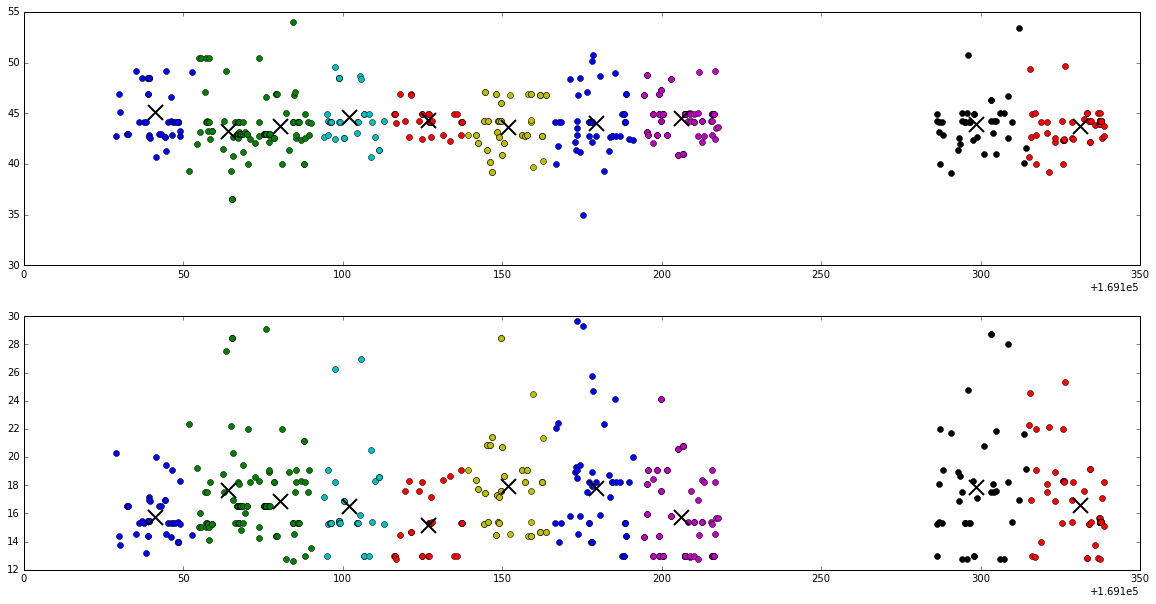

In [50]:
fig = plt.figure(figsize=(20,10))
#f, axarr = plt.subplots(2, sharex=True)
for i in range(k):
    
    # select only data observations with cluster label == i
    ds = mydata[np.where(labels==i)]
    #ds = mydata[np.where(label_list==i+2)]
    # plot the data observations
    ax1 = plt.subplot(211)
    ax1 = plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines1 = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines1,ms=15.0)
    plt.setp(lines1,mew=2.0)
    
    ax2 = plt.subplot(212)
    ax2 = plt.plot(ds[:,0],ds[:,2],'o')
    lines2 = plt.plot(centroids[i,0],centroids[i,2],'kx')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
plt.show()

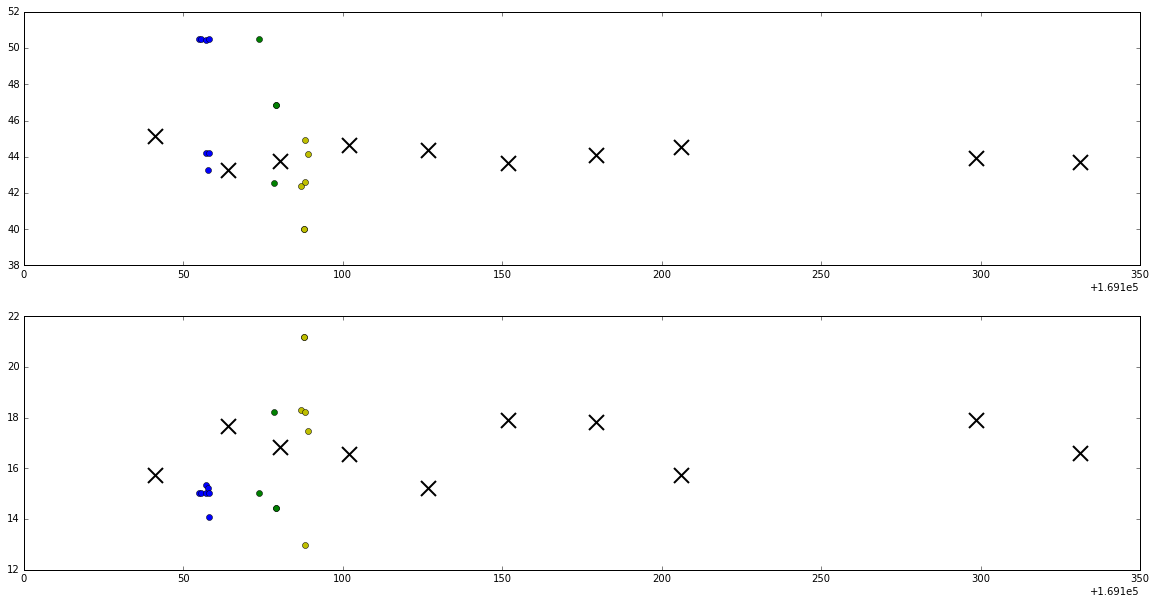

In [51]:
fig = plt.figure(figsize=(20,10))
#f, axarr = plt.subplots(2, sharex=True)
for i in range(k):
    
    # select only data observations with cluster label == i
    #ds = mydata[np.where(labels==i)]
    ds = mydata[np.where(label_list==i+2)]
    # plot the data observations
    ax1 = plt.subplot(211)
    ax1 = plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines1 = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines1,ms=15.0)
    plt.setp(lines1,mew=2.0)
    
    ax2 = plt.subplot(212)
    ax2 = plt.plot(ds[:,0],ds[:,2],'o')
    lines2 = plt.plot(centroids[i,0],centroids[i,2],'kx')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
plt.show()

None
[[  1.69279549e+05   4.40716233e+01   1.78324847e+01]
 [  1.69164076e+05   4.32757473e+01   1.76744189e+01]
 [  1.69431313e+05   4.37321773e+01   1.65927029e+01]
 [  1.69201786e+05   4.46311579e+01   1.65613455e+01]
 [  1.69306125e+05   4.45414607e+01   1.57546544e+01]
 [  1.69251911e+05   4.36609135e+01   1.79180460e+01]
 [  1.69398517e+05   4.39565687e+01   1.79013846e+01]
 [  1.69141068e+05   4.51305723e+01   1.57516528e+01]
 [  1.69180218e+05   4.37435282e+01   1.68510008e+01]
 [  1.69226562e+05   4.43694762e+01   1.52115131e+01]]


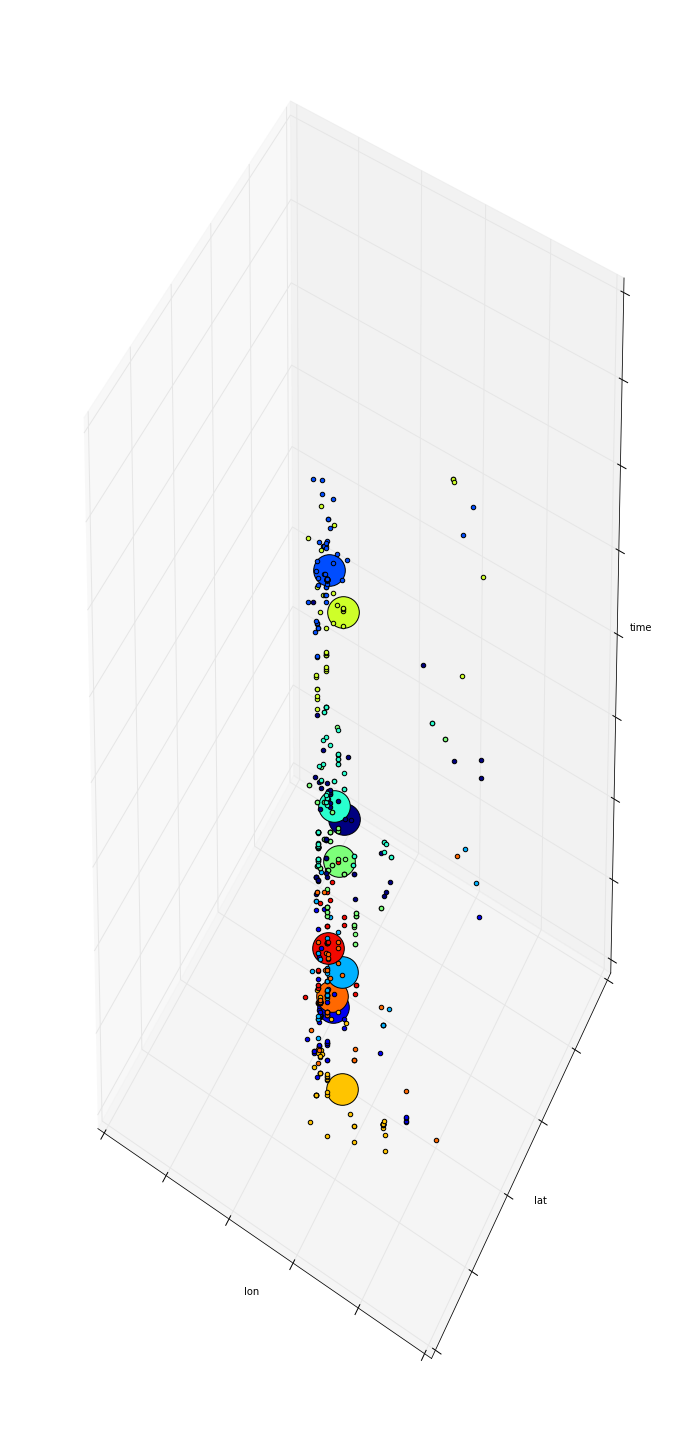

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(1, figsize=(10,20))#plt.figaspect(2), figsize=(10, 8))
plt.clf()
ax = fig.gca(projection='3d')

ax = Axes3D(fig, rect=[0, 0.05, .95, 1])#, elev=48, azim=134)

plt.cla()

cmap = mpl.cm.jet
print ax.set_autoscale_on(True)

for i in range(k):
    ds = mydata[np.where(labels==i)]
    ax.scatter(ds[:, 1], ds[:, 2], ds[:, 0], c=cmap(i / float(k)), depthshade=False) #labels.astype(np.float), depthshade=False)
    lines = ax.scatter(centroids[i,1],centroids[i,2],centroids[i,0],c=cmap(i / float(k)),s=1000)
    #ax.setp(lines,ms=15.0)
    #ax.setp(lines,mew=2.0)
print centroids
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('time')
plt.show()
fig.savefig('plot.png', bbox_inches='tight')